<a href="https://colab.research.google.com/github/AlexxLai/ml0716/blob/master/iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
iris
# df = pd.DataFrame(iris["data"],columns = iris["feature_names"])
# df["target"] = iris["target"] # [Setosa,Versicolor,Virginica]=[0,1,2]
# df.to_csv("iris2.csv",encoding = "utf-8",index = False) # index是最前項的0,1,2,...的值
# df

In [12]:
from sklearn.model_selection import train_test_split # 設計測試資料集，引入此套件
# [90% data , 10% data , 90% target , 10% target]
x_train,x_test,y_train,y_test = train_test_split(iris["data"],iris["target"],test_size = 0.1) # 依照位置切割比例


In [25]:
from sklearn.tree import DecisionTreeClassifier # 引入決策樹套件
# clf = DecisionTreeClassifier() # 交由程式設定節點值
clf = DecisionTreeClassifier(max_depth = 3) # 設定節點最大值(修整枝葉)
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

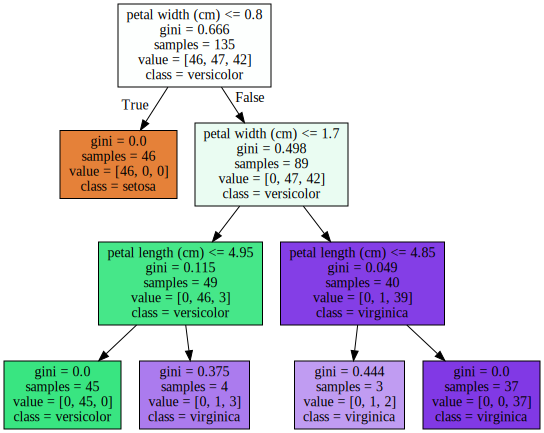

In [26]:
import graphviz
from sklearn.tree import export_graphviz
g = export_graphviz(clf,
                    feature_names = iris["feature_names"],
                    class_names = iris["target_names"],
                    filled = True # 顏色
                    )
graphviz.Source(g)

In [27]:
from sklearn.metrics import accuracy_score # 利用此套件預測正確率
pre = clf.predict(x_test)
# print(pre)
# print(y_test)
accuracy_score(pre,y_test)

0.9333333333333333

In [28]:
# 混淆矩陣: 列數字不等於行數字即為分類錯誤
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,pre)
pd.DataFrame(cm)

,0,1,2
0,4,0,0
1,0,2,1
2,0,0,8


In [29]:
# 檢查每個特徵對於預測東西的重要程度
# 依照結果可以看出後兩項的顯著(重要)程度比起前兩項來得高許多
clf.feature_importances_

array([0.       , 0.       , 0.0545504, 0.9454496])